In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Applying PCA to 2D Data

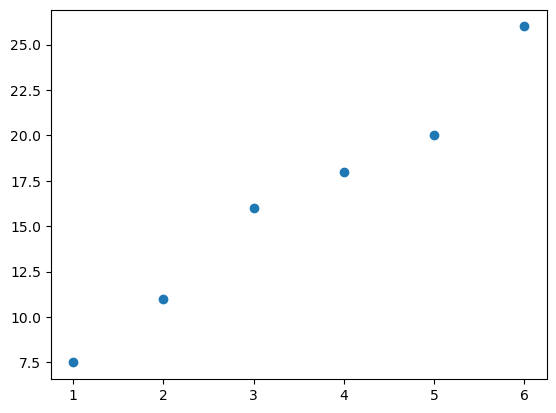

In [3]:
x1 = np.array([1,2,3,4,5,6])
x2 = np.array([7.5, 11, 16, 18, 20, 26])
plt.scatter(x1, x2)
plt.show()

In [6]:
x = np.c_[x1, x2]

In [10]:
pca = PCA(n_components=1)
x_t = pca.fit_transform(x)
x_t

array([[-9.26049952],
       [-5.62047228],
       [-0.53656217],
       [ 1.65958219],
       [ 3.85572654],
       [ 9.90222524]])

In [11]:
pca.components_

array([[0.27096719, 0.96258858]])

In [14]:
x_inv = pca.inverse_transform(x_t)
x_inv

array([[ 0.99070848,  7.50261555],
       [ 1.97703643, 11.00646421],
       [ 3.35460926, 15.90017805],
       [ 3.94969232, 18.01416153],
       [ 4.54477538, 20.12814502],
       [ 6.18317813, 25.94843564]])

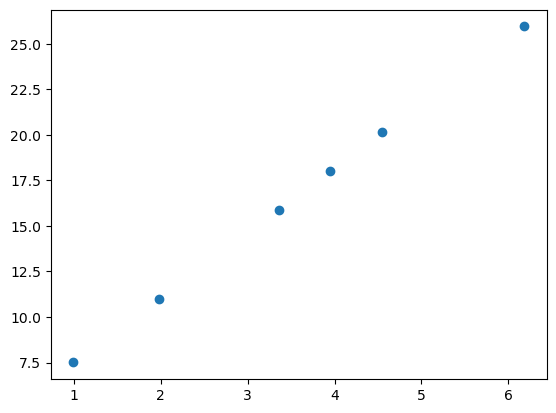

In [15]:
plt.scatter(x_inv[:,0], x_inv[:,1])
plt.show()

Applying PCA to 3D Data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [23]:
np.random.seed(123)

mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)


In [22]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)


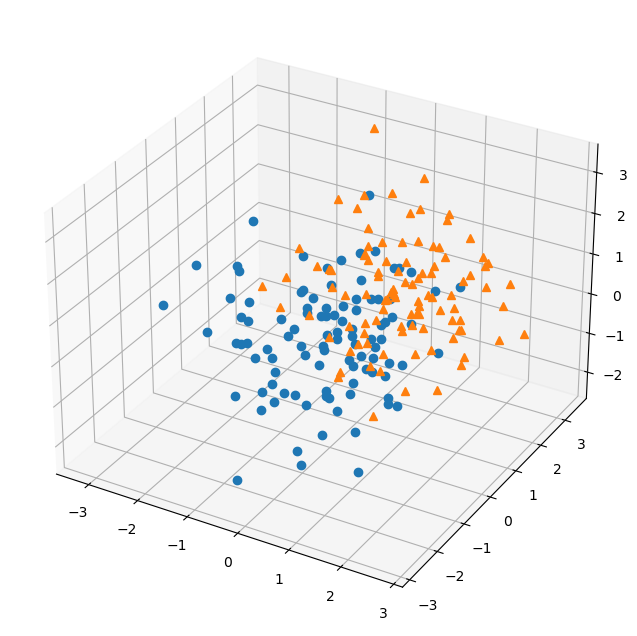

In [25]:
from mpl_toolkits.mplot3d import axes3d, proj3d

fig = plt.figure(figsize=(8,8))
ax = fig. add_subplot(111, projection='3d')
ax.plot(class1[:,0], class1[:,1], class1[:,2], "o")
ax.plot(class2[:,0], class2[:,1], class2[:,2], "^")
plt.show()

In [30]:
all_data = np.concatenate((class1, class2))
all_data.shape

(200, 3)

In [34]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(all_data)
transformed_data.shape, pca.components_

((200, 2),
 array([[-0.40812999, -0.72884111, -0.5497459 ],
        [ 0.29052008,  0.46718583, -0.83506616]]))

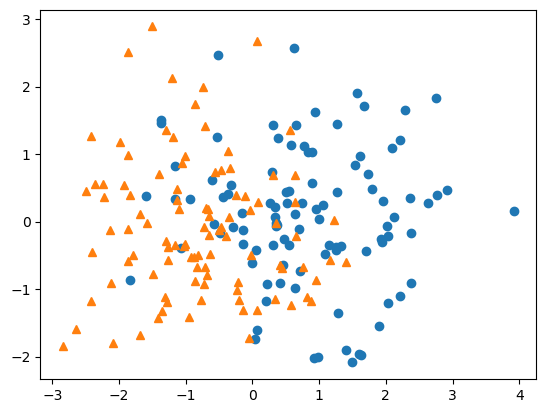

In [36]:
plt.plot(transformed_data[0:100,0], transformed_data[0:100,1], "o")
plt.plot(transformed_data[100:200,0], transformed_data[100:200,1], "^")
plt.show()

Analysis on Breast Cancer Dataset

In [62]:
from sklearn import decomposition, linear_model, datasets
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
breast_cancer = datasets.load_breast_cancer()
breast_cancer.data.shape, breast_cancer.target.shape

((569, 30), (569,))

In [59]:
sc = StandardScaler()
x= breast_cancer.data
y = breast_cancer.target
x_std = sc.fit_transform(x)
x_std.shape, y.shape


((569, 30), (569,))

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, random_state=0)

In [60]:
pca = decomposition.PCA(n_components=15)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


In [67]:
lr = linear_model.LogisticRegression()
start = time.time()
lr.fit(x_train, y_train)
ending = time.time()
print(ending - start)
lr.score(x_test, y_test)

0.004916667938232422


0.965034965034965

In [77]:
lr = linear_model.LogisticRegression()
start = time.time()
lr.fit(x_train_pca, y_train)
ending = time.time()
print(ending - start)
lr.score(x_test_pca, y_test)

0.004387855529785156


0.958041958041958

In [78]:
pca.components_, pca.explained_variance_

(array([[ 2.28240979e-01,  9.59082795e-02,  2.35480422e-01,
          2.34434752e-01,  1.37145319e-01,  2.28171889e-01,
          2.54340322e-01,  2.64690199e-01,  1.31731874e-01,
          4.86826974e-02,  2.18803482e-01,  6.03456600e-03,
          2.18141293e-01,  2.21402086e-01,  1.31790832e-02,
          1.52030562e-01,  1.39231779e-01,  1.69025004e-01,
          2.70385692e-02,  9.53426441e-02,  2.38132485e-01,
          9.86220297e-02,  2.44674933e-01,  2.39542237e-01,
          1.27298498e-01,  1.98472931e-01,  2.14882667e-01,
          2.51519739e-01,  1.18001710e-01,  1.21392651e-01],
        [-2.21347830e-01, -4.85254345e-02, -2.03445909e-01,
         -2.22288570e-01,  1.84308320e-01,  1.54813769e-01,
          7.87151969e-02, -1.74711359e-02,  2.02716767e-01,
          3.57105128e-01, -1.02614253e-01,  9.04739174e-02,
         -9.32050601e-02, -1.53474054e-01,  1.95575209e-01,
          2.30514589e-01,  2.27431775e-01,  1.53727058e-01,
          1.79476881e-01,  2.81108036e-

Our OWN PCA Implementation

In [69]:
all_data_t = all_data.T
cov = np.cov(all_data_t)
cov

array([[1.09848679, 0.23837761, 0.16033549],
       [0.23837761, 1.38886352, 0.28876086],
       [0.16033549, 0.28876086, 1.2382874 ]])

In [72]:
eig_val, eig_vec = np.linalg.eig(cov)
eig_val, eig_vec

(array([1.74015291, 0.96452828, 1.02095652]),
 array([[ 0.40812999,  0.86546404, -0.29052008],
        [ 0.72884111, -0.50052776, -0.46718583],
        [ 0.5497459 ,  0.02107043,  0.83506616]]))

In [74]:
eig_pair =[]
for i in range(len(eig_val)):
    eig_vec_temp  = eig_vec[:,i]
    eig_pair.append((eig_val[i], eig_vec_temp))
eig_pair

[(1.7401529117624224, array([0.40812999, 0.72884111, 0.5497459 ])),
 (0.9645282760432846, array([ 0.86546404, -0.50052776,  0.02107043])),
 (1.0209565163084977, array([-0.29052008, -0.46718583,  0.83506616]))]

In [76]:
eig_pair.sort(reverse=True)
eig_pair

[(1.7401529117624224, array([0.40812999, 0.72884111, 0.5497459 ])),
 (1.0209565163084977, array([-0.29052008, -0.46718583,  0.83506616])),
 (0.9645282760432846, array([ 0.86546404, -0.50052776,  0.02107043]))]

How to find the Optimal K Features

In [79]:
total = sum(pca.explained_variance_)
k=0
current_variance = 0
while current_variance/total < 0.99:
    current_variance += pca.explained_variance_[k]
    k= k +1
k

13